**Цель работы:**

изучение алгоритмов и методов классификации на практике.

1. Чтение файла (набора данных)

1.1 Загрузить датасет с помощью библиотеки pandas.

In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
path = 'C:/Users/Алиса/Desktop/ГУАП/3 курс/1 семестр/Введение в анализ данных/Лабораторная работа №5/employee_attrition.csv'
df = pd.read_csv(path, sep=',')
df.head(5)

,age,gender,department,job_level,marital_status,monthly_income,years_at_company,overtime,performance_rating,distance_from_home_km,training_hours_last_year,Attrition
0,31,F,Engineering,1,Single,5163.0,14,No,3,24.1,141.0,0
1,29,M,Sales,2,Divorced,13878.0,1,No,3,4.6,141.0,0
2,26,F,Support,1,Married,4712.0,6,No,3,8.4,148.0,0
3,61,F,Engineering,2,Single,12196.0,12,Yes,4,2.2,98.0,0
4,59,F,Sales,5,Single,15823.0,18,No,4,7.2,10.0,0


2. Провести предварительную обработку данных.

In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3048 entries, 0 to 3047
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       3048 non-null   int64  
 1   gender                    3048 non-null   object 
 2   department                3048 non-null   object 
 3   job_level                 3048 non-null   int64  
 4   marital_status            3048 non-null   object 
 5   monthly_income            3048 non-null   float64
 6   years_at_company          3048 non-null   int64  
 7   overtime                  3048 non-null   object 
 8   performance_rating        3048 non-null   int64  
 9   distance_from_home_km     3048 non-null   float64
 10  training_hours_last_year  3048 non-null   float64
 11  Attrition                 3048 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 285.9+ KB


In [288]:
df.describe()

,age,job_level,monthly_income,years_at_company,performance_rating,distance_from_home_km,training_hours_last_year,Attrition
count,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000
mean,41.308071,2.188976,7727.857283,20.102362,2.838583,10.236490,104.930118,0.091207
std,13.431709,1.165800,4058.833918,11.826501,0.733775,9.208483,76.474385,0.287951
min,18.000000,1.000000,1488.000000,0.000000,1.000000,-1.900000,0.000000,0.000000
25%,30.000000,1.000000,4901.750000,10.000000,2.000000,4.100000,50.000000,0.000000
50%,42.000000,2.000000,6733.000000,20.000000,3.000000,8.200000,102.000000,0.000000
75%,53.000000,3.000000,9529.500000,30.000000,3.000000,14.100000,151.000000,0.000000
max,64.000000,5.000000,35395.000000,40.000000,4.000000,99.840000,735.000000,1.000000


2.1. Замена у столбца 'distance_from_home_km' отрицательных значений на положительные.

In [289]:
df['distance_from_home_km'] = df['distance_from_home_km'].abs()

2.2. Проверка наличия пропусков, а также названия столбцов.

In [290]:
for column in df.columns:
    print(f'{column} : {df[column].isna().sum()}')

age : 0
gender : 0
department : 0
job_level : 0
marital_status : 0
monthly_income : 0
years_at_company : 0
overtime : 0
performance_rating : 0
distance_from_home_km : 0
training_hours_last_year : 0
Attrition : 0


2.3. Проверка на наличие явных и неявных дубликатов.

In [291]:
df[df.duplicated()] # получение дубликатов с помощью логической индексации
print(df.duplicated().sum())

0


In [292]:
for column in df.columns:
    if column in ['gender', 'department' , 'marital_status', 'overtime']:
        df[column] = df[column].str.upper()
        print(f'{column}: {df[column].unique()}')

gender: ['F' 'M']
department: ['ENGINEERING' 'SALES' 'SUPPORT' 'FINANCE' 'HR']
marital_status: ['SINGLE' 'DIVORCED' 'MARRIED']
overtime: ['NO' 'YES']


2.4. Прямое и порядковое кодирование качественных признаков.

Прямое кодирование.

In [293]:
'''cat_cols = ['gender', 'department', 'marital_status', 'overtime']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)
df.info()'''


"cat_cols = ['gender', 'department', 'marital_status', 'overtime']\ndf = pd.get_dummies(df, columns=cat_cols, drop_first=True)\nbool_cols = df.select_dtypes(include='bool').columns\ndf[bool_cols] = df[bool_cols].astype(int)\ndf.info()"

3. Выделить целевую переменную, которую необходимо предсказать. Не включать эту
целевую переменную в модель. Построить матрицу диаграмм рассеяния, выделив
значения целевой переменной разными цветами.


In [294]:
df = df.drop(['gender', 'department', 'marital_status', 'overtime'], axis=1)
X = df.drop('Attrition', axis=1)
y = df['Attrition']

Матрица диаграмм рассеяния.

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='job_level', ylabel='age'>,
        <Axes: xlabel='monthly_income', ylabel='age'>,
        <Axes: xlabel='years_at_company', ylabel='age'>,
        <Axes: xlabel='performance_rating', ylabel='age'>,
        <Axes: xlabel='distance_from_home_km', ylabel='age'>,
        <Axes: xlabel='training_hours_last_year', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='job_level'>,
        <Axes: xlabel='job_level', ylabel='job_level'>,
        <Axes: xlabel='monthly_income', ylabel='job_level'>,
        <Axes: xlabel='years_at_company', ylabel='job_level'>,
        <Axes: xlabel='performance_rating', ylabel='job_level'>,
        <Axes: xlabel='distance_from_home_km', ylabel='job_level'>,
        <Axes: xlabel='training_hours_last_year', ylabel='job_level'>],
       [<Axes: xlabel='age', ylabel='monthly_income'>,
        <Axes: xlabel='job_level', ylabel='monthly_income'>,
        <Axes: xlabel='monthly_income', ylabel='monthly_

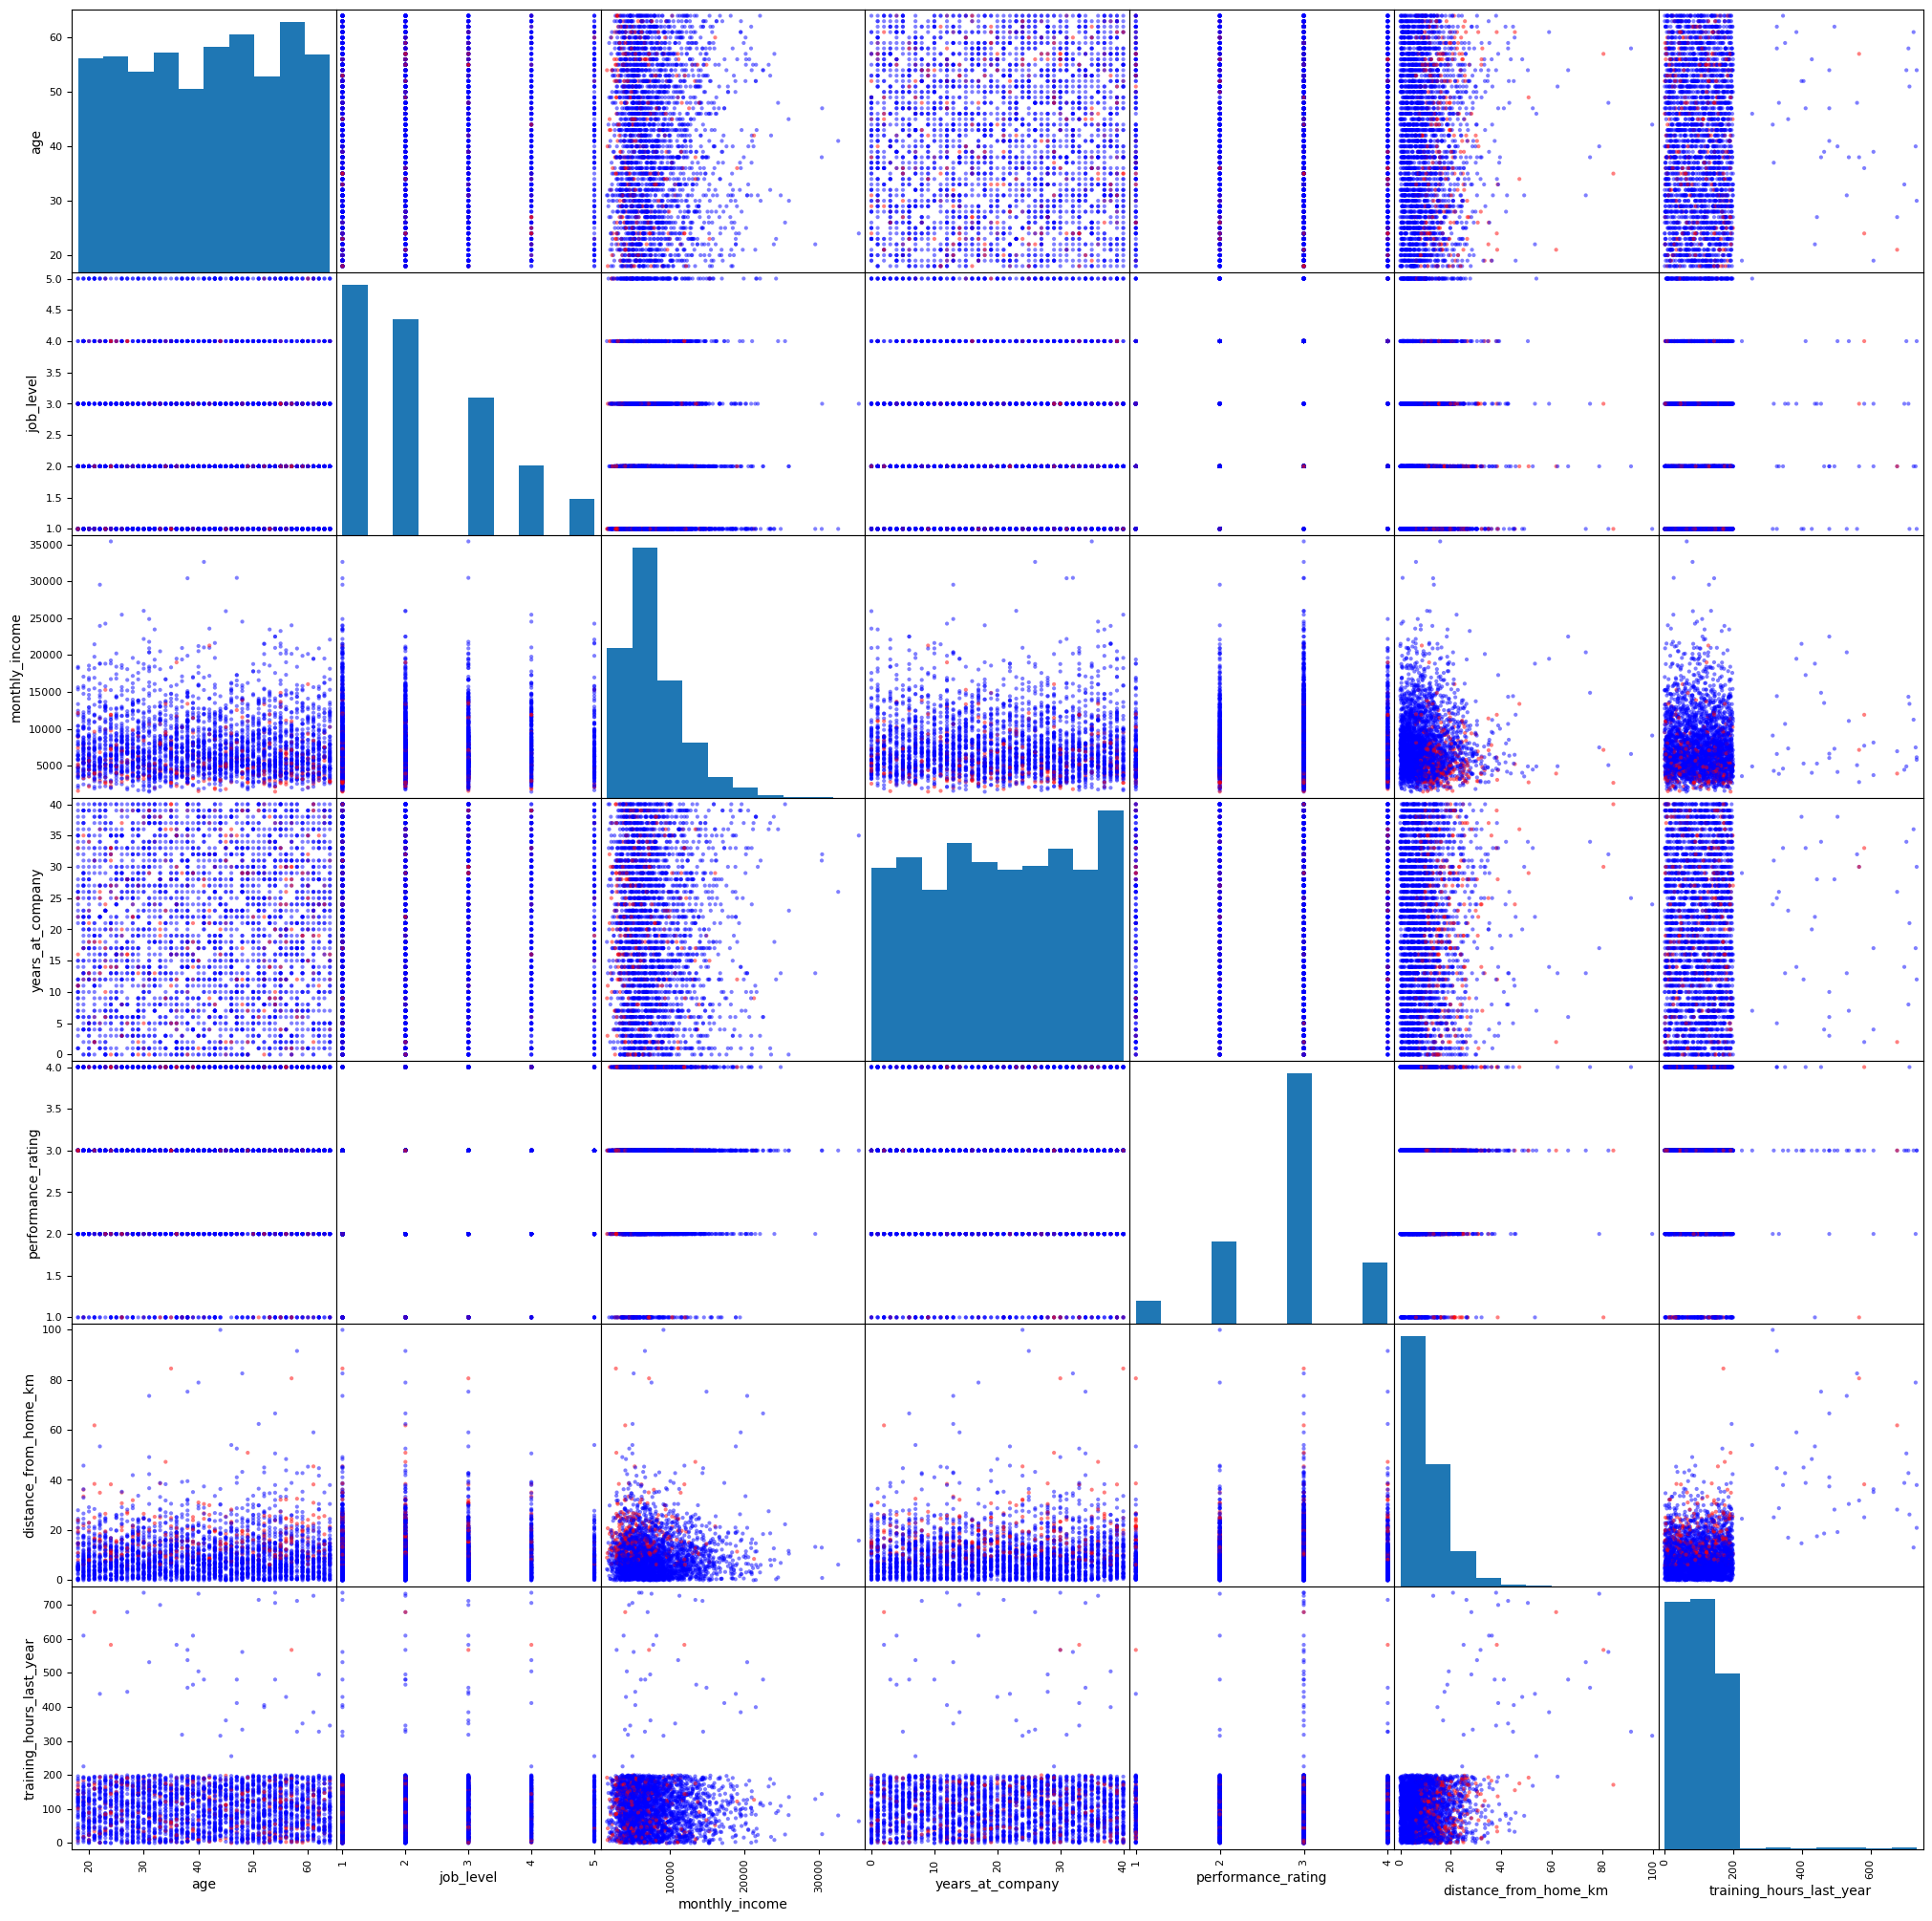

In [295]:
pd.plotting.scatter_matrix(X, figsize=(25,25), c=y, cmap='bwr')

Выводы

4. Разбить набор данных на тренировочной и тестовый датасеты с помощью train_test_split и
выполнить стандартизацию числовых данных.


Разбиение данных.

In [296]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

Стандартизация данных.

In [297]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # создание объекта класса Scaler
X_train_scaled = scaler.fit_transform(X_train) #Обучение + преобразование
X_test_scaled = scaler.transform(X_test)

5. Разработать предсказательную модель качественного отклика различными методами.


5.1. Метод k- ближайших соседей.

In [298]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

Количество соседей было выбрано 5, так как при большем или меньшем значении метрика AUC снижается.

5.2. Дерево решений.

In [299]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)

Максимальная глубина выбрана 5, так как при большем или меньшем значении метрика AUC снижается.

5.3. Логистическая регрессия.

In [300]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(max_iter=1000, random_state=42)
lg.fit(X_train_scaled, y_train)
y_pred_logreg = lg.predict(X_test_scaled)

5.4. Случайный лес.

In [301]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, max_depth=8, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

6. Оценить ошибку классификации для каждого метода. Подсчитать метрики "Accuracy",
"Precision", "Recall", "Balanced accuracy", 'F1 score'.


6.1. Для метода k- ближайших соседей.

In [302]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
acc1 = accuracy_score(y_test, y_pred_knn)
precision1 = precision_score(y_test, y_pred_knn)
recall1 = recall_score(y_test, y_pred_knn)
balanced_accuracy1 = balanced_accuracy_score(y_test, y_pred_knn)
f1_1= f1_score(y_test, y_pred_knn)
print('Accuracy:', acc1)
print('Precision:', precision1)
print('Recall:', recall1)
print('Balanced accuracy:', balanced_accuracy1)
print('F1 score:', f1_1)

Accuracy: 0.8976377952755905
Precision: 0.15384615384615385
Recall: 0.028985507246376812
Balanced accuracy: 0.5065562456866805
F1 score: 0.04878048780487805


6.2. Для метода Дерево решений.

In [303]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
acc2 = accuracy_score(y_test, y_pred_dt)
precision2 = precision_score(y_test, y_pred_dt)
recall2 = recall_score(y_test, y_pred_dt)
balanced_accuracy2 = balanced_accuracy_score(y_test, y_pred_dt)
f1_2= f1_score(y_test, y_pred_dt)
print('Accuracy:', acc2)
print('Precision:', precision2)
print('Recall:', recall2)
print('Balanced accuracy:', balanced_accuracy2)
print('F1 score:', f1_2)

Accuracy: 0.8989501312335958
Precision: 0.1
Recall: 0.014492753623188406
Balanced accuracy: 0.5007528703180877
F1 score: 0.02531645569620253


6.3. Для метода Логистическая регрессия.

In [304]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
acc3 = accuracy_score(y_test, y_pred_logreg)
precision3 = precision_score(y_test, y_pred_logreg)
recall3 = recall_score(y_test, y_pred_logreg)
balanced_accuracy3 = balanced_accuracy_score(y_test, y_pred_logreg)
f1_3= f1_score(y_test, y_pred_logreg)
print('Accuracy:', acc3)
print('Precision:', precision3)
print('Recall:', recall3)
print('Balanced accuracy:', balanced_accuracy3)
print('F1 score:', f1_3)

Accuracy: 0.905511811023622
Precision: 0.2
Recall: 0.014492753623188406
Balanced accuracy: 0.5043603739255913
F1 score: 0.02702702702702703


6.4. Для метода Случайный лес.

In [305]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
acc4 = accuracy_score(y_test, y_pred_rf)
precision4 = precision_score(y_test, y_pred_rf)
recall4 = recall_score(y_test, y_pred_rf)
balanced_accuracy4 = balanced_accuracy_score(y_test, y_pred_rf)
f1_4= f1_score(y_test, y_pred_rf)
print('Accuracy:', acc4)
print('Precision:', precision4)
print('Recall:', recall4)
print('Balanced accuracy:', balanced_accuracy4)
print('F1 score:', f1_4)

Accuracy: 0.9094488188976378
Precision: 0.0
Recall: 0.0
Balanced accuracy: 0.5
F1 score: 0.0


c:\Users\Alice\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


7. Построить матрицу неточностей с помощью confusion_matrix для каждого метода.

7.1. Для метода k- ближайших соседей.

In [306]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_knn)
tn, fp, fn, tp = cm.ravel() # получение конкретных значений из мат-рицы # Визуализация
print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")


TN: 682, FP: 11, FN: 67, TP: 2


7.2. Для метода Дерево решений.

In [307]:
cm1 = confusion_matrix(y_test, y_pred_dt)
tn1, fp1, fn1, tp1 = cm1.ravel() # получение конкретных значений из мат-рицы # Визуализация
print(f"TN: {tn1}, FP: {fp1}, FN: {fn1}, TP: {tp1}")

TN: 684, FP: 9, FN: 68, TP: 1


7.3. Для метода Логистическая регрессия.

In [308]:
cm2 = confusion_matrix(y_test, y_pred_logreg)
tn2, fp2, fn2, tp2 = cm2.ravel() # получение конкретных значений из мат-рицы # Визуализация
print(f"TN: {tn2}, FP: {fp2}, FN: {fn2}, TP: {tp2}")

TN: 689, FP: 4, FN: 68, TP: 1


7.4. Для метода Случайный лес.

In [309]:
cm3 = confusion_matrix(y_test, y_pred_rf)
tn3, fp3, fn3, tp3 = cm3.ravel() # получение конкретных значений из мат-рицы # Визуализация
print(f"TN: {tn3}, FP: {fp3}, FN: {fn3}, TP: {tp3}")

TN: 693, FP: 0, FN: 69, TP: 0


8.  Построить графики ROC-кривой для каждого метода на одном графике (4 линии на
одном графике) для сравнения.


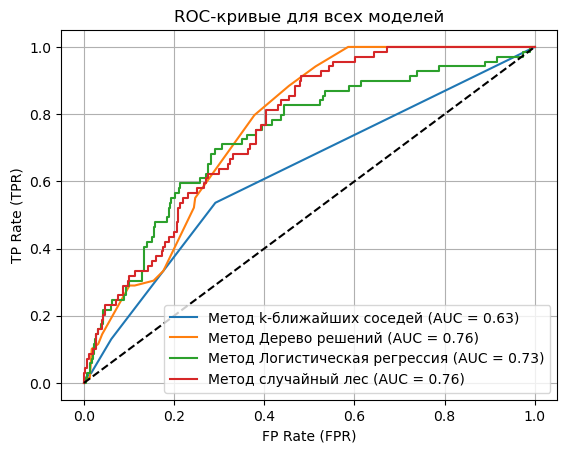

In [310]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]
y_prob_dt = dt.predict_proba(X_test_scaled)[:, 1]
y_prob_logreg = lg.predict_proba(X_test_scaled)[:, 1]
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]


fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
auc_knn = roc_auc_score(y_test, y_prob_knn)

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
auc_dt = roc_auc_score(y_test, y_prob_dt)

fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
auc_logreg = roc_auc_score(y_test, y_prob_logreg)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

plt.plot(fpr_knn, tpr_knn, label=f'Метод k-ближайших соседей (AUC = {auc_knn:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Метод Дерево решений (AUC = {auc_dt:.2f})')
plt.plot(fpr_logreg, tpr_logreg, label=f'Метод Логистическая регрессия (AUC = {auc_logreg:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Метод случайный лес (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  

plt.xlabel('FP Rate (FPR)')
plt.ylabel('TP Rate (TPR)')
plt.title('ROC-кривые для всех моделей')
plt.legend()
plt.grid()
plt.show()

Выводы